In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
left_x = -100
right_x = 100
left_y = -100
right_y = 100

m_1 = 1
m_2 = 0.5
c = 1
omega = 1
a = 1

k_1 = np.arcsin(omega/2 * np.sqrt(m_1/c)) * 2 / a

In [3]:
particles_num_x = np.round(np.arange(left_x, right_x, a)/a)
particles_num_y = np.round(np.arange(left_y, right_y, a)/a)

In [4]:
particles_mass = np.zeros(shape=(len(particles_num_y),len(particles_num_x)))
for i, num_i in enumerate(particles_num_x):
    for j, num_j in enumerate(particles_num_y):
        if num_i < 0:
            particles_mass[j, i] = m_1
        else:
            particles_mass[j, i] = m_2
particles_mass

array([[1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       ...,
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5],
       [1. , 1. , 1. , ..., 0.5, 0.5, 0.5]])

In [5]:
particles_disp = np.zeros(shape=(len(particles_num_y),len(particles_num_x)), dtype=float)
particles_vel = np.zeros(shape=(len(particles_num_y),len(particles_num_x)), dtype=float)

beta = 0.1
n_0 = -30
u_0 = 1
g_1 = a * np.sqrt(c/m_1) * np.cos(k_1*a/2)

for i, num_x in enumerate(particles_num_x):
    for j, num_y in enumerate(particles_num_y):
        particles_disp[j, i] = u_0 * np.exp(-beta**2/2 * (num_x - n_0)**2) * np.sin(num_x * a * k_1)
        particles_vel[j, i] = -u_0 * np.exp(-beta**2/2 * (num_x - n_0)**2)
        particles_vel[j, i] *= (omega * np.cos(k_1*a*num_x) - beta**2*g_1/a*(num_x-n_0)*np.sin(num_x * a * k_1))
particles_disp

array([[ 1.98296854e-11, -6.74406421e-25, -7.88210489e-11, ...,
         8.20072292e-36,  2.29153595e-36,  1.07604261e-50],
       [ 1.98296854e-11, -6.74406421e-25, -7.88210489e-11, ...,
         8.20072292e-36,  2.29153595e-36,  1.07604261e-50],
       [ 1.98296854e-11, -6.74406421e-25, -7.88210489e-11, ...,
         8.20072292e-36,  2.29153595e-36,  1.07604261e-50],
       ...,
       [ 1.98296854e-11, -6.74406421e-25, -7.88210489e-11, ...,
         8.20072292e-36,  2.29153595e-36,  1.07604261e-50],
       [ 1.98296854e-11, -6.74406421e-25, -7.88210489e-11, ...,
         8.20072292e-36,  2.29153595e-36,  1.07604261e-50],
       [ 1.98296854e-11, -6.74406421e-25, -7.88210489e-11, ...,
         8.20072292e-36,  2.29153595e-36,  1.07604261e-50]])

In [6]:
particles_disp.shape

(200, 200)

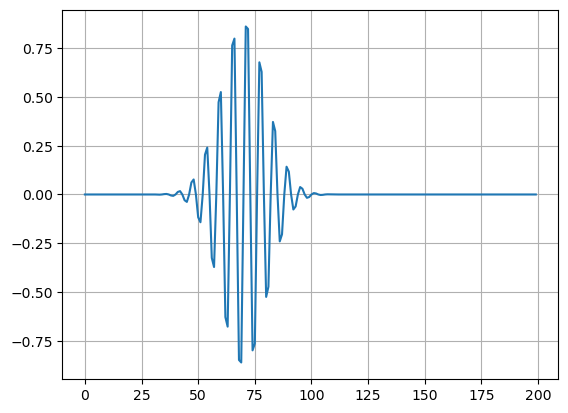

In [7]:
plt.plot(particles_disp[10])
plt.grid()

In [8]:
dt = 0.01
t_max = 85
times = np.arange(0, t_max, dt)

In [9]:
particles_history = [particles_disp.copy()]
for t in tqdm(times):
    deform = np.roll(particles_disp,-1) + np.roll(particles_disp,1) + np.roll(particles_disp,-1,axis=0) + \
        np.roll(particles_disp,1,axis=0) - 4*particles_disp
    particles_vel += (c/particles_mass)*deform*dt
    particles_disp += particles_vel * dt
    if t % 5 == 0:
        particles_history.append(particles_disp.copy())

100%|██████████| 8500/8500 [00:02<00:00, 3174.95it/s]


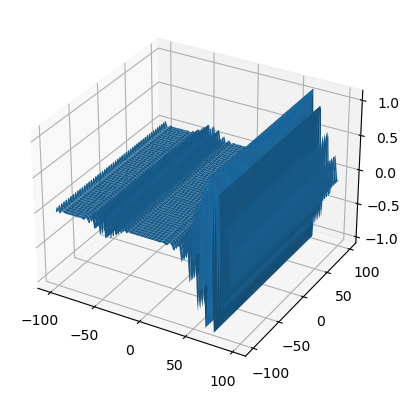

In [10]:
fig = plt.figure()
ax = plt.axes(projection="3d")
x, y = np.meshgrid(particles_num_x, particles_num_y)
surf = ax.plot_surface(x, y, particles_disp)
plt.show()

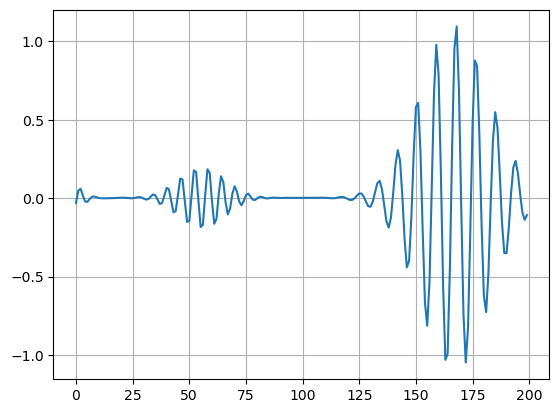

In [11]:
plt.plot(particles_disp[0])
plt.grid()

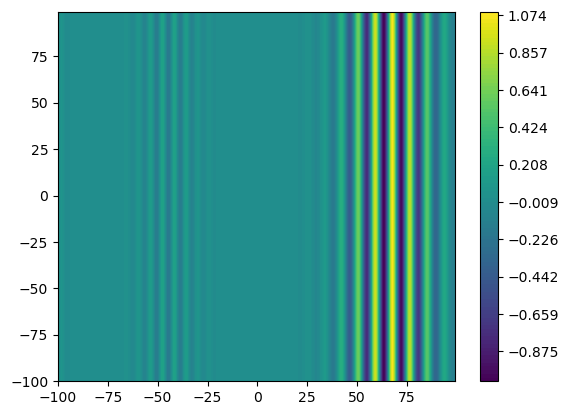

In [12]:
X, Y = np.meshgrid(particles_num_x, particles_num_y)
levels = np.linspace(particles_disp.min(), particles_disp.max(), 100)
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, particles_disp,levels=levels)
cbar = fig.colorbar(cs)
plt.show()

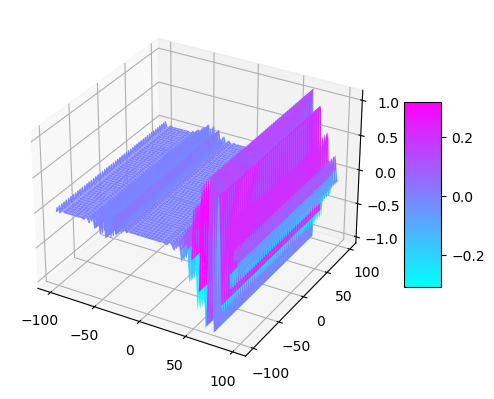

In [13]:
#%matplotlib qt
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(particles_num_x, particles_num_y)
surf = ax.plot_surface(X, Y, particles_disp, cmap=cm.cool)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [14]:
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

fig, ax = plt.subplots()
X, Y = np.meshgrid(particles_num_x, particles_num_y)
levels = np.linspace(particles_disp.min(), particles_disp.max(), 100)

cf = ax.contourf(X, Y, particles_history[0], levels=levels)
cbar = fig.colorbar(cf)
plt.grid()
plt.plot([0,0],[particles_num_y[0],particles_num_y[-1]], c='r', linewidth=0.8)
plt.xlabel('Номер частицы по оси Ox')
plt.ylabel('Номер частицы по оси Oy')

def update(frame):
    cf = ax.contourf(X, Y, particles_history[frame], levels=levels)
    plt.title(f't={5*frame}')
    return cf, 

animation.FuncAnimation(fig, update, frames=len(particles_history))

TODO: изменение colorbar в анимации: [https://stackoverflow.com/questions/39472017/how-to-animate-the-colorbar-in-matplotlib](https://stackoverflow.com/questions/39472017/how-to-animate-the-colorbar-in-matplotlib).